# Objective:
* The dataset aims to teach how to build, train, and evaluate an LSTM model for predicting future values in a univariate time series dataset (e.g., predicting the next value in a sequence of stock prices, weather data, etc.). The tutorial is designed for beginners and provides both theory and implementation in Python with the Keras library.



In [1]:
import numpy as np 
import pandas as pd
import tensorflow as tf 
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_squared_error


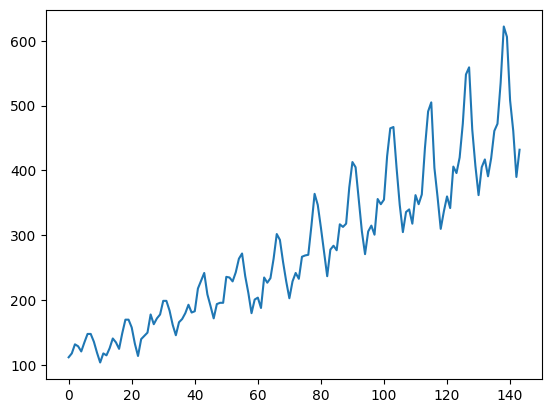

In [2]:
import matplotlib.pyplot as plt
df = pd.read_csv('E:\\LSTM\\international-airline-passengers.csv', usecols = [1])
plt.plot(df)
plt.show()

# Forming Random set through Tensorflow 

* this code is a Tensorflow function which is used to set the seed for random number generation in Tensorflow as it is used in splitting data in to training and test sets.

In [15]:
# fix random seed for reproducibility
tf.random.set_seed(7)

# Analyzing the dataset and converting the datatype

* The data type of dataset is in 'int format and for better accuracy the data.

In [18]:
# load the dataset
dataframe = pd.read_csv('E:\\LSTM\\international-airline-passengers.csv', usecols=[1])
dataset = dataframe.values
dataset = dataset.astype('float32')
dataset

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.],
       [104.],
       [118.],
       [115.],
       [126.],
       [141.],
       [135.],
       [125.],
       [149.],
       [170.],
       [170.],
       [158.],
       [133.],
       [114.],
       [140.],
       [145.],
       [150.],
       [178.],
       [163.],
       [172.],
       [178.],
       [199.],
       [199.],
       [184.],
       [162.],
       [146.],
       [166.],
       [171.],
       [180.],
       [193.],
       [181.],
       [183.],
       [218.],
       [230.],
       [242.],
       [209.],
       [191.],
       [172.],
       [194.],
       [196.],
       [196.],
       [236.],
       [235.],
       [229.],
       [243.],
       [264.],
       [272.],
       [237.],
       [211.],
       [180.],
       [201.],
       [204.],
       [188.],
       [235.],
       [227.],
       [234.],
       [264.],
       [30

# Scale the dataset

* After converting the data in to float type thenext process is to scale the data using MinMax Scaler as the dataset(sequential data is sensitive during scaling of data) thats why normalization is done using MinMaxScaler 

In [19]:
scaler  = MinMaxScaler(feature_range = (0,1))
dataset = scaler.fit_transform(dataset)
dataset

array([[0.01544401],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984557],
       [0.08494207],
       [0.08494207],
       [0.06177607],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123553],
       [0.04247104],
       [0.07142857],
       [0.05984557],
       [0.04054055],
       [0.08687258],
       [0.12741312],
       [0.12741312],
       [0.10424709],
       [0.05598456],
       [0.01930502],
       [0.06949806],
       [0.07915059],
       [0.08880308],
       [0.14285713],
       [0.11389962],
       [0.13127413],
       [0.14285713],
       [0.18339768],
       [0.18339768],
       [0.15444016],
       [0.11196911],
       [0.08108109],
       [0.1196911 ],
       [0.12934363],
       [0.14671814],
       [0.17181468],
       [0.14864865],
       [0.15250966],
       [0.22007722],
       [0.24324325],
       [0.26640925],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

# Splitting of Data

* The dataset is splitted into train and test data Where the train dataset size is estimated upto 67% and test size is 33%.

In [20]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

97 48


# Converting the Sequential data

 * Next step is to convert the structuring sequential data (like time series) into smaller overlapping segments of inputs and corresponding target outputs. This is crucial for time series prediction tasks, where the goal is to predict future values based on past observations.

In [ ]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [22]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

* In this reshape of input data is done in to 3D format (samples, timesteps, features) which is required for Keras LSTM layers.

In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [30]:
print(trainX)

[[[0.01544401]]

 [[0.02702703]]

 [[0.05405405]]

 [[0.04826255]]

 [[0.03281853]]

 [[0.05984557]]

 [[0.08494207]]

 [[0.08494207]]

 [[0.06177607]]

 [[0.02895753]]

 [[0.        ]]

 [[0.02702703]]

 [[0.02123553]]

 [[0.04247104]]

 [[0.07142857]]

 [[0.05984557]]

 [[0.04054055]]

 [[0.08687258]]

 [[0.12741312]]

 [[0.12741312]]

 [[0.10424709]]

 [[0.05598456]]

 [[0.01930502]]

 [[0.06949806]]

 [[0.07915059]]

 [[0.08880308]]

 [[0.14285713]]

 [[0.11389962]]

 [[0.13127413]]

 [[0.14285713]]

 [[0.18339768]]

 [[0.18339768]]

 [[0.15444016]]

 [[0.11196911]]

 [[0.08108109]]

 [[0.1196911 ]]

 [[0.12934363]]

 [[0.14671814]]

 [[0.17181468]]

 [[0.14864865]]

 [[0.15250966]]

 [[0.22007722]]

 [[0.24324325]]

 [[0.26640925]]

 [[0.2027027 ]]

 [[0.16795367]]

 [[0.13127413]]

 [[0.17374519]]

 [[0.17760617]]

 [[0.17760617]]

 [[0.25482625]]

 [[0.25289574]]

 [[0.24131274]]

 [[0.26833975]]

 [[0.3088803 ]]

 [[0.32432434]]

 [[0.25675675]]

 [[0.20656371]]

 [[0.14671814]

In [31]:
print(testX)

[[[0.3803089 ]]

 [[0.48648646]]

 [[0.47104248]]

 [[0.484556  ]]

 [[0.6138996 ]]

 [[0.6969112 ]]

 [[0.70077217]]

 [[0.57915056]]

 [[0.46911195]]

 [[0.38803086]]

 [[0.44787642]]

 [[0.45559844]]

 [[0.4131274 ]]

 [[0.4980695 ]]

 [[0.47104248]]

 [[0.49999997]]

 [[0.6389961 ]]

 [[0.7471043 ]]

 [[0.7741313 ]]

 [[0.57915056]]

 [[0.492278  ]]

 [[0.3976834 ]]

 [[0.44980696]]

 [[0.49420848]]

 [[0.45945945]]

 [[0.5830116 ]]

 [[0.5637065 ]]

 [[0.61003864]]

 [[0.71042466]]

 [[0.8571429 ]]

 [[0.8783784 ]]

 [[0.69305015]]

 [[0.5849421 ]]

 [[0.4980695 ]]

 [[0.58108103]]

 [[0.6042471 ]]

 [[0.554054  ]]

 [[0.60810804]]

 [[0.6891892 ]]

 [[0.71042466]]

 [[0.8320464 ]]

 [[1.        ]]

 [[0.96911204]]

 [[0.7799227 ]]

 [[0.6891892 ]]

 [[0.55212355]]]


# Building LSTM model

* In this LSTM layer consist of 4 memory units and outputs a single value lossfucntion is measured by Mean Squared Error and error are optimize through Adam Optimizer.

In [25]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100


C:\Users\gkris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


95/95 - 2s - 16ms/step - loss: 0.0504
Epoch 2/100
95/95 - 0s - 2ms/step - loss: 0.0263
Epoch 3/100
95/95 - 0s - 2ms/step - loss: 0.0185
Epoch 4/100
95/95 - 0s - 2ms/step - loss: 0.0166
Epoch 5/100
95/95 - 0s - 2ms/step - loss: 0.0156
Epoch 6/100
95/95 - 0s - 2ms/step - loss: 0.0147
Epoch 7/100
95/95 - 0s - 2ms/step - loss: 0.0138
Epoch 8/100
95/95 - 0s - 2ms/step - loss: 0.0129
Epoch 9/100
95/95 - 0s - 2ms/step - loss: 0.0119
Epoch 10/100
95/95 - 0s - 2ms/step - loss: 0.0110
Epoch 11/100
95/95 - 0s - 2ms/step - loss: 0.0100
Epoch 12/100
95/95 - 0s - 2ms/step - loss: 0.0090
Epoch 13/100
95/95 - 0s - 2ms/step - loss: 0.0080
Epoch 14/100
95/95 - 0s - 2ms/step - loss: 0.0071
Epoch 15/100
95/95 - 0s - 2ms/step - loss: 0.0062
Epoch 16/100
95/95 - 0s - 2ms/step - loss: 0.0054
Epoch 17/100
95/95 - 0s - 2ms/step - loss: 0.0047
Epoch 18/100
95/95 - 0s - 4ms/step - loss: 0.0041
Epoch 19/100
95/95 - 0s - 2ms/step - loss: 0.0035
Epoch 20/100
95/95 - 0s - 2ms/step - loss: 0.0031
Epoch 21/100
95/95 -

* The training model is used to make predictions by using both train and test datasets and then convert the predictions and actual values back to the original scale for meaningful interpretation.

* Next is to calculate the Mean Squared Error to evaluate the model performance.

In [26]:
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

trainPredict = scaler.inverse_transform(train_predict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(test_predict)
testY = scaler.inverse_transform([testY])

trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score : %.2f RMSE'%(trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score:% 2f RMSE'% (testScore))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
Train Score : 23.03 RMSE
Test Score: 49.166651 RMSE


# Plot the Model Prediction 
* Now the train, test data are plotted.

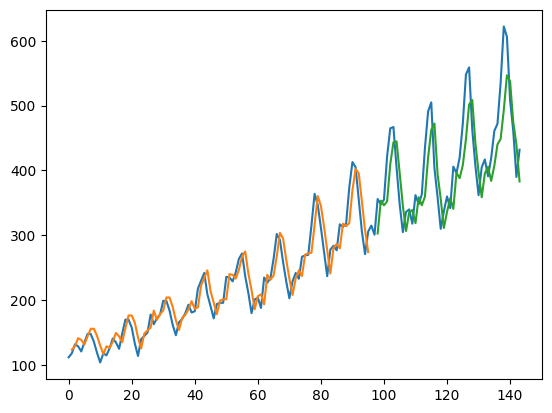

In [27]:

trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()